#**ANALIZANDO EL RANKING DE LAS BARRAS DE CHOCOLATE**
--------------

###**Base de datos extraída de : Flavors of Cacao**
#### Actualizada el 19 de Julio del 2021.
####Los rankings originales fueron recopilados por Brady Brelinski, miembro fundador de la Manhattan Chocolate Society. Para obtener información actualizada, así como contenido adicional (incluyendo entrevistas con chocolateros artesanos), consulte su sitio web:  
http://flavorsofcacao.com/chocolate_database.html.

###*La base de datos actualizada y mostrada en la web principal se encuentra alojada en :*
http://flavorsofcacao.com/database_w_REF.html



##**0. Importar librerías y funciones a utilizar.**
--------------

In [4]:
#Importar librerías para análisis de data
import pandas as pd
import numpy as np

#Importar librería para gráficar
import matplotlib.pyplot as plt
import seaborn as sns

#Importar funciones para imprimir con colores
from termcolor import  cprint , colored

# Importar librería para analizar elementos vacíos
import missingno as msno

# Importar librería para manejar la ruta de los archivos
import os

'''
Opcional : Para Webscrapping o búsqueda de datos en una web
'''
#Importar librerías para  extraer tabla de web
import requests
#Importar función que lee el código html
from bs4 import BeautifulSoup
#Importar librería para crear un archivo csv
import csv

#Comando para almacenar gráficos producidos dentro del notebook
%matplotlib inline
#Comando funcional en google colab que permite interactuar con dataframe
%load_ext google.colab.data_table


##**1. Obtener base de datos.**
--------------

###**1.1 Mediante pandas.**

In [5]:
# Dirección url de la página Web
url='http://flavorsofcacao.com/database_w_REF.html'

'''
El método pd.read_html() genera una lista de dataframes a partir
de las tablas encontradas en la dirección web proporcionada
Por lo que es necesario seleccionar la tabla deseada mediante el índice de las lista

Lista = [ df1 , df2 , df3]
índice     0     1     2

Lista[0] = df1
'''
# Creamos la variable tablas que contiene los dataframes
tablas=pd.read_html(url) 
# Comprobamos el número de tablas en la variable
cprint(f'En la url proporcionada hay {len(tablas)} tabla(s). \n', 'cyan', attrs=['bold'])
# Guardamos el dataframe en la variable df_ranking
df_ranking=tablas[0]
# Mostramos las primeras 5 filas
df_ranking.head(8)

En la url proporcionada hay 1 tabla(s). 



,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50


###**1.2. Opcional : Mediante web scrapping - Lectura del código HTML de la página web.**

In [6]:
'''El web-scrapping se basa en analizar la estructura y 
código HTML de una página para recuperar los datos deseados,

Para análisis de datos, se buscan tablas <table>.
<tbody> : Cuerpo de la tabla.
<tr> : Fila que agrupa celdas.
<th> : Celda cabezal.
<td> : Celda normal.
'''
# Dirección url de la página Web
url='http://flavorsofcacao.com/database_w_REF.html'

# Extraer el contenido de la página y la colocamos en una variable
web_html=requests.get(url).content

# Creamos la variable soup que es un archivo html que refleja la información de la pagina
soup = BeautifulSoup(web_html, 'html.parser')



''' Cada página web puede tener una diferente estructura y forma de agrupar los códigos,
por lo que es necesario INSPECCIONAR cada caso de forma particular.

El método mostrado se le acredita al siguiente usuario :
https://stackoverflow.com/questions/52066389/scrape-table-built-with-spry-framework-using-beautifulsoup

'''
# Mediante la líbreria cv y el uso de los atributos de la variable soup como soup.table.tr.find_all
# Creamos un csv con los datos de la tabla de la web.
with open('cacao_ranking_actualizado.csv', 'w', newline = '', encoding = 'utf-8') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerow([th.get_text(strip = True) for th in soup.table.tr.find_all('th')])
    for tr in soup.table.find_all('tr')[1:]:
        csv_output.writerow([td.get_text(strip = True) for td in tr.find_all('td')])

# Convertimos el csv en un dataframe con pandas
df_ranking = pd.read_csv('cacao_ranking_actualizado.csv', delimiter = ',')
df_ranking.head(5)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


###1.3. Salvamos el archivo y lo guardamos en una carpeta


In [7]:
'''
 Creo una carpeta en el directorio
 donde estoy trabajando

  !mkdir NOMBRE_DE_LA_CARPETA
''' 
!mkdir base_de_datos

'''
 Mover un archivo de un directorio a
 la nueva carpeta

  !mv (nombre archivo) (ruta de la carpeta a mover/)
'''

!mv cacao_ranking_actualizado.csv /content/base_de_datos/


##**2. Exploración del dataset.**
--------------


###2.1. Información del dataset

In [8]:
''' Observamos la información del dataset, para observar
el número de observaciones, si existen celdas vacías,
y el tipo de variables que almacena cada columna.
'''
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2452 non-null   int64  
 1   Company (Manufacturer)            2452 non-null   object 
 2   Company Location                  2452 non-null   object 
 3   Review Date                       2452 non-null   int64  
 4   Country of Bean Origin            2451 non-null   object 
 5   Specific Bean Origin or Bar Name  2452 non-null   object 
 6   Cocoa Percent                     2452 non-null   object 
 7   Ingredients                       2365 non-null   object 
 8   Most Memorable Characteristics    2452 non-null   object 
 9   Rating                            2452 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 191.7+ KB


###2.2. Variables cuantitativas del dataset

In [9]:
''' Observamos los estadísticos descriptivos
de las columnas con variables integer o float
'''
df_ranking.describe()

,REF,Review Date,Rating
count,2452.00000,2452.000000,2452.000000
mean,1390.24633,2014.163540,3.192435
std,735.87702,3.847958,0.447543
min,5.00000,2006.000000,1.000000
25%,781.00000,2011.000000,3.000000
50%,1422.00000,2014.000000,3.250000
75%,2020.00000,2017.000000,3.500000
max,2634.00000,2021.000000,4.000000


###2.3. Observaciones incompletas por datos faltantes

Existen 88 filas con observaciones incompletas o datos faltantes.



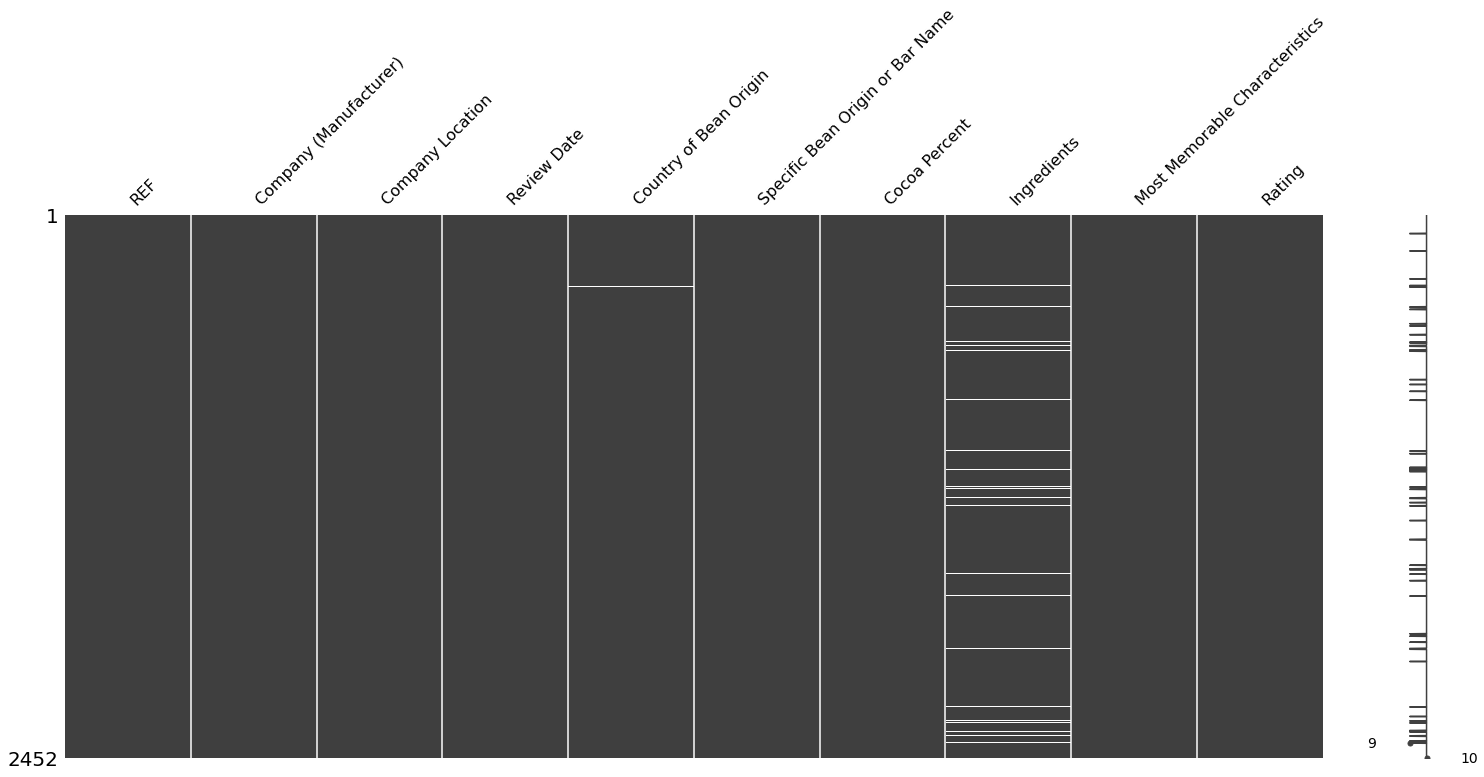

In [10]:
''' Observamos gráficamente la distribución de los datos vacíos
en el set de datos.
'''
cprint(f'Existen {len(df_ranking[df_ranking.isnull().any(1)])} filas con observaciones incompletas o datos faltantes.\n', color='red', attrs=['bold'])
msno.matrix(df_ranking)
plt.show()

###2.4. Observación de datos duplicados.

In [11]:
'''
Observamos si existen duplicados en el dataset,
de haberlos, imprimimos las filas duplicadas.
'''
if len(df_ranking[df_ranking.duplicated()]) == 0 :
  cprint('No existen filas con valores duplicados en este dataset', color='red', attrs=['bold'])
else :
  cprint(f'Existen {len(df_ranking[df_ranking.duplicated()])} duplicados en este dataset', color='red', attrs=['bold'])
  print(df_ranking[df_ranking.duplicated()])

No existen filas con valores duplicados en este dataset


###2.4. NÚMERO DE VALORES ÚNICOS POR COLUMNA

In [12]:
print (f"Número de valores únicos en cada columna:\n\n{ df_ranking.nunique().sort_values(ascending = False) }")

Número de valores únicos en cada columna:

Most Memorable Characteristics      2410
Specific Bean Origin or Bar Name    1544
REF                                  610
Company (Manufacturer)               570
Company Location                      67
Country of Bean Origin                61
Cocoa Percent                         46
Ingredients                           21
Review Date                           16
Rating                                13
dtype: int64


#3. CORRECCIÓN DEL DATASET DE ACUERDO A PARÁMETROS Y OBJETIVOS DEL ESTUDIO:
-----------------------------------------------

####**Objetivo principal :**  
*    Evaluar los rankings recibidos de las barras elaboradas con cacao peruano en los últimos 6 años (2016-2021).

####**Objetivos secundario :** 

*   Identificar a los 10 países de origen del cacao que registran mejor ranking de sabor de barras de chocolate.
*   Identificar a los 10 países que son sedes de las compañías que producen las barras de cacao con mejor sabor.
*   Identificar el porcentaje de cacao en las barras de chocolate con mejor puntaje.



###3.1. Creamos una copia del dataframe original, para salvaguardar la información en caso se requiera regresar a un estado previo a las modificaciones.

In [59]:
df_preánalisis = df_ranking.copy()

###3.2. Limpieza de acuerdo a variable

####3.2.1. Variable : "Review Date"
Lapso de tiempo objetivo = 2016 - 2021

In [60]:
cprint(f"Inicialmente se registraban: {len(df_preánalisis)} observaciones", color='green')
df_preánalisis = df_preánalisis.loc[(df_preánalisis['Review Date'] >= 2016) & (df_preánalisis['Review Date']<= 2021)]
cprint(f"Luego de realizar el recorte del tiempo : {len(df_preánalisis)} observaciones", color='cyan')

Inicialmente se registraban: 2452 observaciones
Luego de realizar el recorte del tiempo : 921 observaciones


In [86]:
#Distribución de valores en la variable
df_preánalisis['Review Date'].value_counts().sort_index().to_frame().rename(columns={'Review Date':'Observaciones por "Review Date"'}).style.bar(color='#8E2DE2')

,"Observaciones por ""Review Date"""
2016,217
2017,105
2018,228
2019,193
2020,81
2021,97


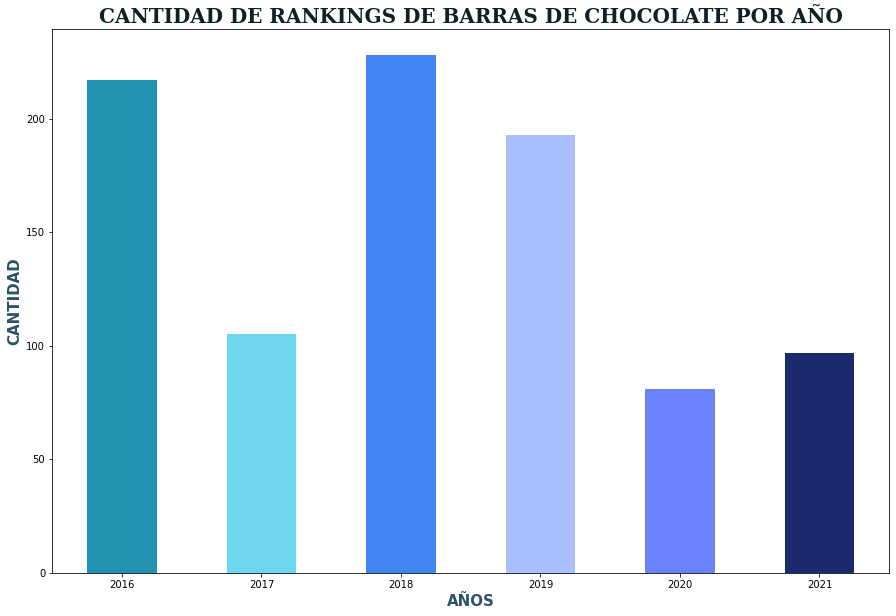

In [119]:
### HISTOGRAMA : CANTIDAD DE RANKINGS POR AÑO
font = {'family': 'Serif',
        'color':  '#0F2027',
        'weight': 'bold',
        'size': 20,
        }
font1 = {'family': 'sans-serif',
        'color':  '#2C5364',
        'weight': 'bold',
        'size': 15,
        }
plt.figure(figsize=(15,10))
df_preánalisis['Review Date'].value_counts().sort_index().plot.bar(color=['#2193b0','#6dd5ed','#4286f4','#a8c0ff','#6A82FB','#1a2a6c'])
plt.xticks(rotation=0)
plt.title("CANTIDAD DE RANKINGS DE BARRAS DE CHOCOLATE POR AÑO", fontdict=font)
plt.xlabel("AÑOS",fontdict=font1)
plt.ylabel("CANTIDAD",fontdict=font1)
plt.show()

####3.2.1. Variable : "Country of Bean Origin"
Países que son 

In [120]:
df_preánalisis['Country of Bean Origin'].unique()

array(['Tanzania', 'Dominican Republic', 'Madagascar', 'Fiji',
       'Venezuela', 'Uganda', 'India', 'Sao Tome', 'Peru', 'Mexico',
       'Vanuatu', 'Ecuador', 'Nicaragua', 'Vietnam', 'Bolivia', 'Blend',
       'Belize', 'Guatemala', 'Trinidad', 'Honduras', 'Costa Rica',
       'Haiti', 'Colombia', 'Solomon Islands', 'Philippines', 'Brazil',
       'Malaysia', nan, 'Taiwan', 'Congo', 'Ghana', 'Puerto Rico',
       'St. Lucia', 'Sierra Leone', 'Jamaica', 'Grenada', 'Nigeria',
       'Papua New Guinea', 'Indonesia', 'U.S.A.', 'St.Vincent-Grenadines',
       'Thailand', 'Liberia', 'Sao Tome & Principe', 'Sumatra',
       'Ivory Coast', 'Panama', 'Cameroon', 'El Salvador', 'Samoa',
       'Cuba', 'Australia', 'Sulawesi', 'Suriname', 'DR Congo'],
      dtype=object)

In [121]:
df_preánalisis.loc[df_preánalisis['Country of Bean Origin'].isnull()]

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
326,2542,Brasstown,U.S.A.,2021,NaN,Kokoa Kamili,62%,"3- B,S,C","very sweet, melon, caramel",3.0


In [122]:
'''
Corregimos nombres de algunos países para que se adapten a
los nombres estándar internacional
'''
df_preánalisis['Country of Bean Origin']=df_preánalisis['Country of Bean Origin'].replace({'Sao Tome & Principe':'Sao Tome and Principe',
                                                 'Sao Tome':'Sao Tome and Principe',
                                                 'DR Congo':'Congo',
                                                 'St. Lucia':'Saint Lucia',
                                                 'U.S.A.': 'United States',
                                                 'St.Vincent-Grenadines':'Saint Vincent and the Grenadines',
                                                 'Sumatra':'Indonesia',                                         #Sumatra y Sulawesi son islas de Indonesia
                                                 'Sulawesi':'Indonesia'                                                 })

In [123]:
'''
Las barras de chocolate con 'Specific Bean Origin or Bar Name'== 'Kokoa Kamili',
 son chocolates cuyo grano de cacao provino de Tanzania.
Se corregirán en caso no se registre.
'''
df_preánalisis['Country of Bean Origin'] = df_preánalisis.apply(lambda x : 'Tanzania' if (pd.isnull(x['Country of Bean Origin']) ) & (x['Specific Bean Origin or Bar Name'] == 'Kokoa Kamili') else x['Country of Bean Origin'] , axis=1)


In [130]:
#Distribución de valores en la variable
df_preánalisis['Country of Bean Origin'].value_counts().sort_values().to_frame().style.bar(color=['#a8c0ff'])

,Country of Bean Origin
Liberia,1
Ivory Coast,1
Saint Vincent and the Grenadines,1
Australia,1
Grenada,1
Cuba,1
Suriname,1
Panama,2
Nigeria,2
Cameroon,2


###3.2. Limpieza de Valores Faltantes

In [19]:
''' Observamos los datos con valores faltantes.'''
df_preánalisis[df_preánalisis.isnull().any(1)]

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
84,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70%,NaN,"raisins, pungent",3.00
85,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70%,NaN,"few grits, blackcherry, licorice",3.50
415,2084,Cacaodada,South Korea,2018,Ghana,Ghana,70%,NaN,"high astringent, earthy",3.00
416,2084,Cacaodada,South Korea,2018,Dominican Republic,Dominican Republic,70%,NaN,"creamy, complex, astingent",3.25
417,2084,Cacaodada,South Korea,2018,Ecuador,Ecuador,70%,NaN,"floral, rum",3.50
1276,1892,La Chocolaterie Nanairo,Japan,2016,Peru,"Lumas, 2015 Harvest, Batch 6, brown sugar",70%,NaN,"molasses, cardboard, off note",2.25
1277,1892,La Chocolaterie Nanairo,Japan,2016,Peru,"Lumas, 2015 Harvest, Batch 7",70%,NaN,"metallic, cardboard, fruit",2.50
1278,1892,La Chocolaterie Nanairo,Japan,2016,Belize,"Belize, 2014 Harvest, Batch 9",70%,NaN,"nutty, fatty",3.00
1279,1892,La Chocolaterie Nanairo,Japan,2016,Peru,"Tumbes, 2013 Harvest, Batch 8",70%,NaN,"grit, earthy, musty",3.00


In [20]:
'''
Las barras de chocolate con 'Specific Bean Origin or Bar Name'== 'Kokoa Kamili',
 son chocolates cuyo grano de cacao provino de Tanzania.
Se corregirán en caso no se registre.
'''
df_preánalisis['Country of Bean Origin'] = df_preánalisis.apply(lambda x : 'Tanzania' if (pd.isnull(x['Country of Bean Origin']) ) & (x['Specific Bean Origin or Bar Name'] == 'Kokoa Kamili') else x['Country of Bean Origin'] , axis=1)


In [21]:
df_ranking.loc[df_ranking['Specific Bean Origin or Bar Name']=='Blend']

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
356,1303,Burnt Fork Bend,U.S.A.,2014,Blend,Blend,72%,"3- B,S,C","coffee, high roast, spicy",3.25


In [22]:
####3.2.2. Variable : "Review Date"
Lapso de tiempo objetivo = 2016 - 2021

SyntaxError: ignored

In [ ]:
df_ranking['Country of Bean Origin'].unique()

In [ ]:
df_ranking['Country of Bean Origin'].value_counts().sort_index(ascending= True)

In [ ]:
df_ranking['Review Date'].value_counts().sort_index(ascending= False)

In [ ]:
df_ranking